In [59]:
#Importing Libraries & Dependency 
import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
#load dataset
data = pd.read_csv('../data/listings.csv')
data.head()

# dataset Shape & list of columns
print("Shape:", data.shape)
print("Columns:\n", data.columns.tolist())
#print(data.shape)

Shape: (3818, 92)
Columns:
 ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_dep

In [61]:
# Cleaning target 'price' column (removed $ and commas) Converted to values to float
data['price'] = data['price'].replace('[\$,]','',regex=True).astype(float)
#Cleaned extra_people column as well
data['extra_people'] = data['extra_people'].replace('[\$,]','',regex=True).astype(float)
#Cleaned cleaning_fee column as well
data['cleaning_fee'] = data['cleaning_fee'].replace('[\$,]','',regex=True).astype(float)

In [62]:
#Checking Null Values & Column Types
missing_val = data.isnull().sum()
missing_val[missing_val > 0].sort_values(ascending=False)

license                        3818
square_feet                    3721
monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
last_review                     627
first_review                    627
reviews_per_month               627
space                           569
host_response_rate              523
host_response_time              523
neighbourhood                   416
xl_picture_url                  320
medium_url                      320
thumbnail_url               

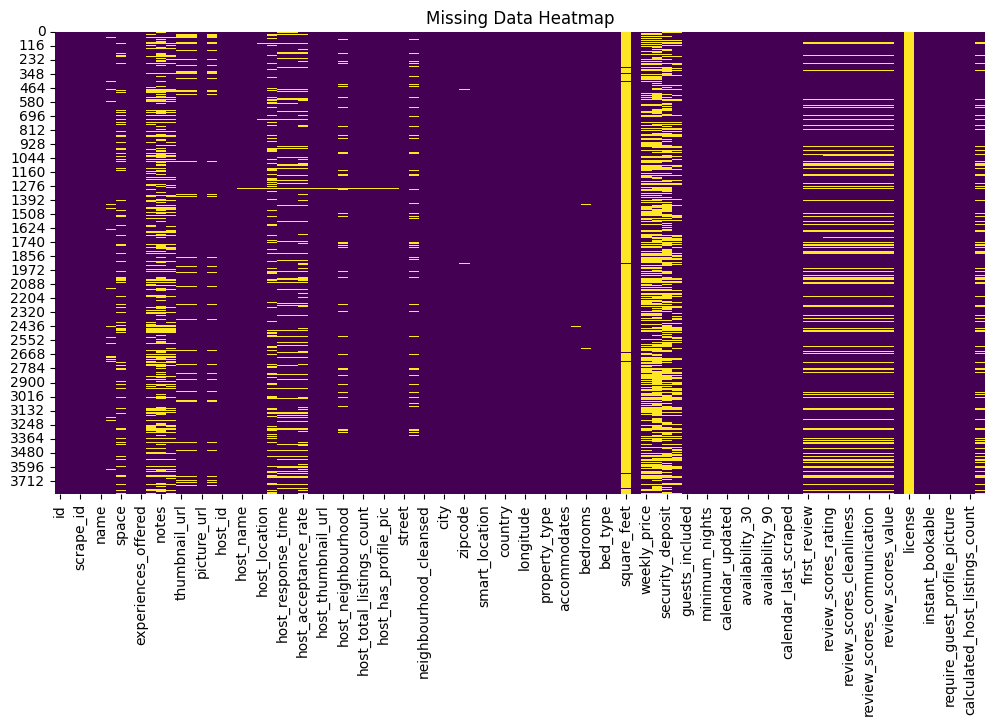

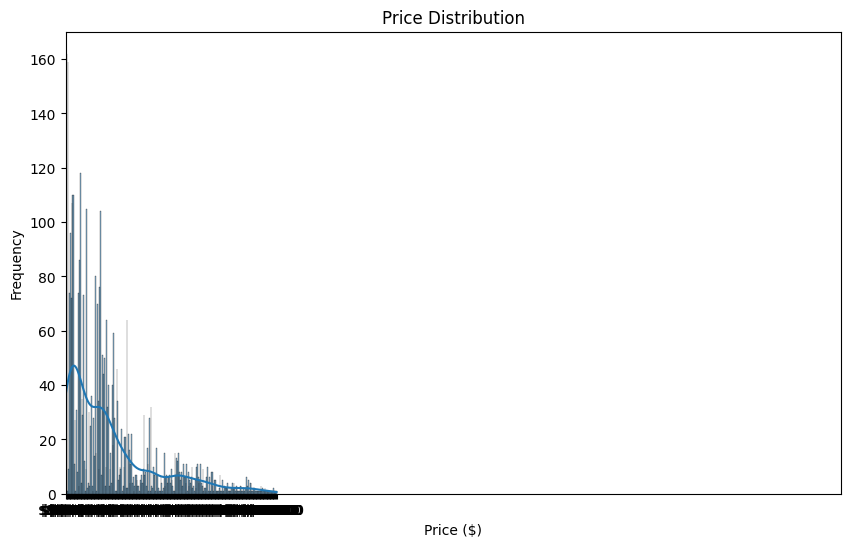

In [63]:
#Extras 
#Plotting missing_val for better reference
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

#Plot2 
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


In [64]:
#Feature Sampling
#Sampled few categorical and numerical variables.
data[['room_type', 'neighbourhood_group_cleansed', 'accommodates', 'bedrooms', 'bathrooms']].sample(5)


,room_type,neighbourhood_group_cleansed,accommodates,bedrooms,bathrooms
558,Entire home/apt,Cascade,4,2.0,2.0
3522,Entire home/apt,Capitol Hill,5,2.0,2.0
1890,Entire home/apt,West Seattle,4,1.0,1.0
1507,Entire home/apt,Downtown,5,2.0,2.0
3110,Private room,Other neighborhoods,2,1.0,2.0


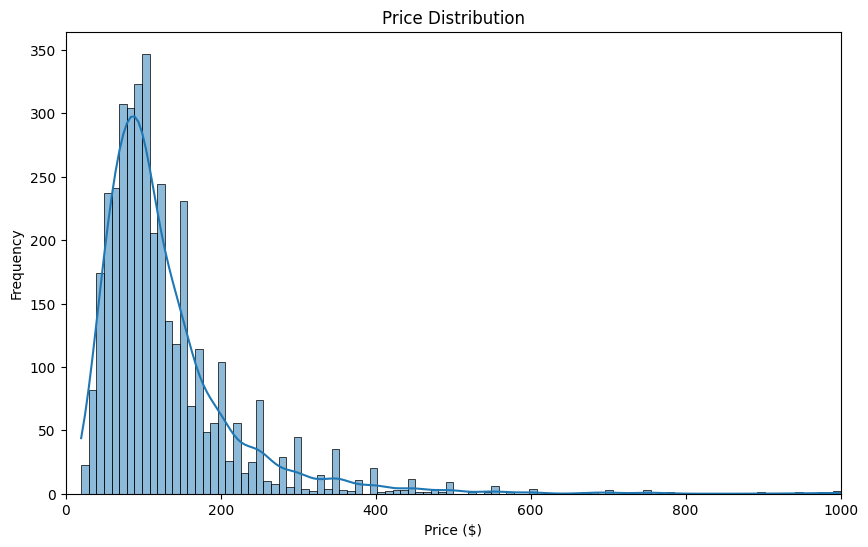

In [65]:
#To Understand Target variable Price distribution in given dataset
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

#Seems like right skewed data.



In [66]:
#Day3: 
# Goal:
# Meaningful features
# Convert categorical data
# Analyze correlation with  (price column)
# Clean dataset for future modeling


In [67]:
#keeping necessary columns for initial analysis 
#Eliminated few (e.g., URLs, host descriptions, IDs)
col_to_keep = [
    'price', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
    'room_type', 'property_type', 'neighbourhood_cleansed',
    'minimum_nights', 'number_of_reviews', 'review_scores_rating',
    'instant_bookable', 'cancellation_policy'
]

#Cleaned dataset
data_cleaned = data[col_to_keep].copy()
data_cleaned.head()

,price,accommodates,bedrooms,bathrooms,beds,room_type,property_type,neighbourhood_cleansed,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy
0,85.0,4,1.0,1.0,1.0,Entire home/apt,Apartment,West Queen Anne,1,207,95.0,f,moderate
1,150.0,4,1.0,1.0,1.0,Entire home/apt,Apartment,West Queen Anne,2,43,96.0,f,strict
2,975.0,11,5.0,4.5,7.0,Entire home/apt,House,West Queen Anne,4,20,97.0,f,strict
3,100.0,3,0.0,1.0,2.0,Entire home/apt,Apartment,West Queen Anne,1,0,NaN,f,flexible
4,450.0,6,3.0,2.0,3.0,Entire home/apt,House,West Queen Anne,1,38,92.0,f,strict


In [71]:
#Handle Missing Values
#dropped rows with too many missing values -- not going for feature imputations
data_cleaned = data_cleaned.dropna(subset=[ 'price', 'bedrooms', 'bathrooms', 'review_scores_rating'])

In [69]:
#Feature Encoding for categorical columns
categorical_cols_encod = ['room_type', 'property_type', 'neighbourhood_cleansed', 'instant_bookable', 'cancellation_policy']
#Enabled drop_first parameter to avoid multi-collinearity for regression and statistical significant models
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols_encod, drop_first=True)
data_encoded.head(2)



,price,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,room_type_Private room,room_type_Shared room,...,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict
0,85.0,4,1.0,1.0,1.0,1,207,95.0,False,False,...,False,True,False,False,False,False,False,False,True,False
1,150.0,4,1.0,1.0,1.0,2,43,96.0,False,False,...,False,True,False,False,False,False,False,False,False,True


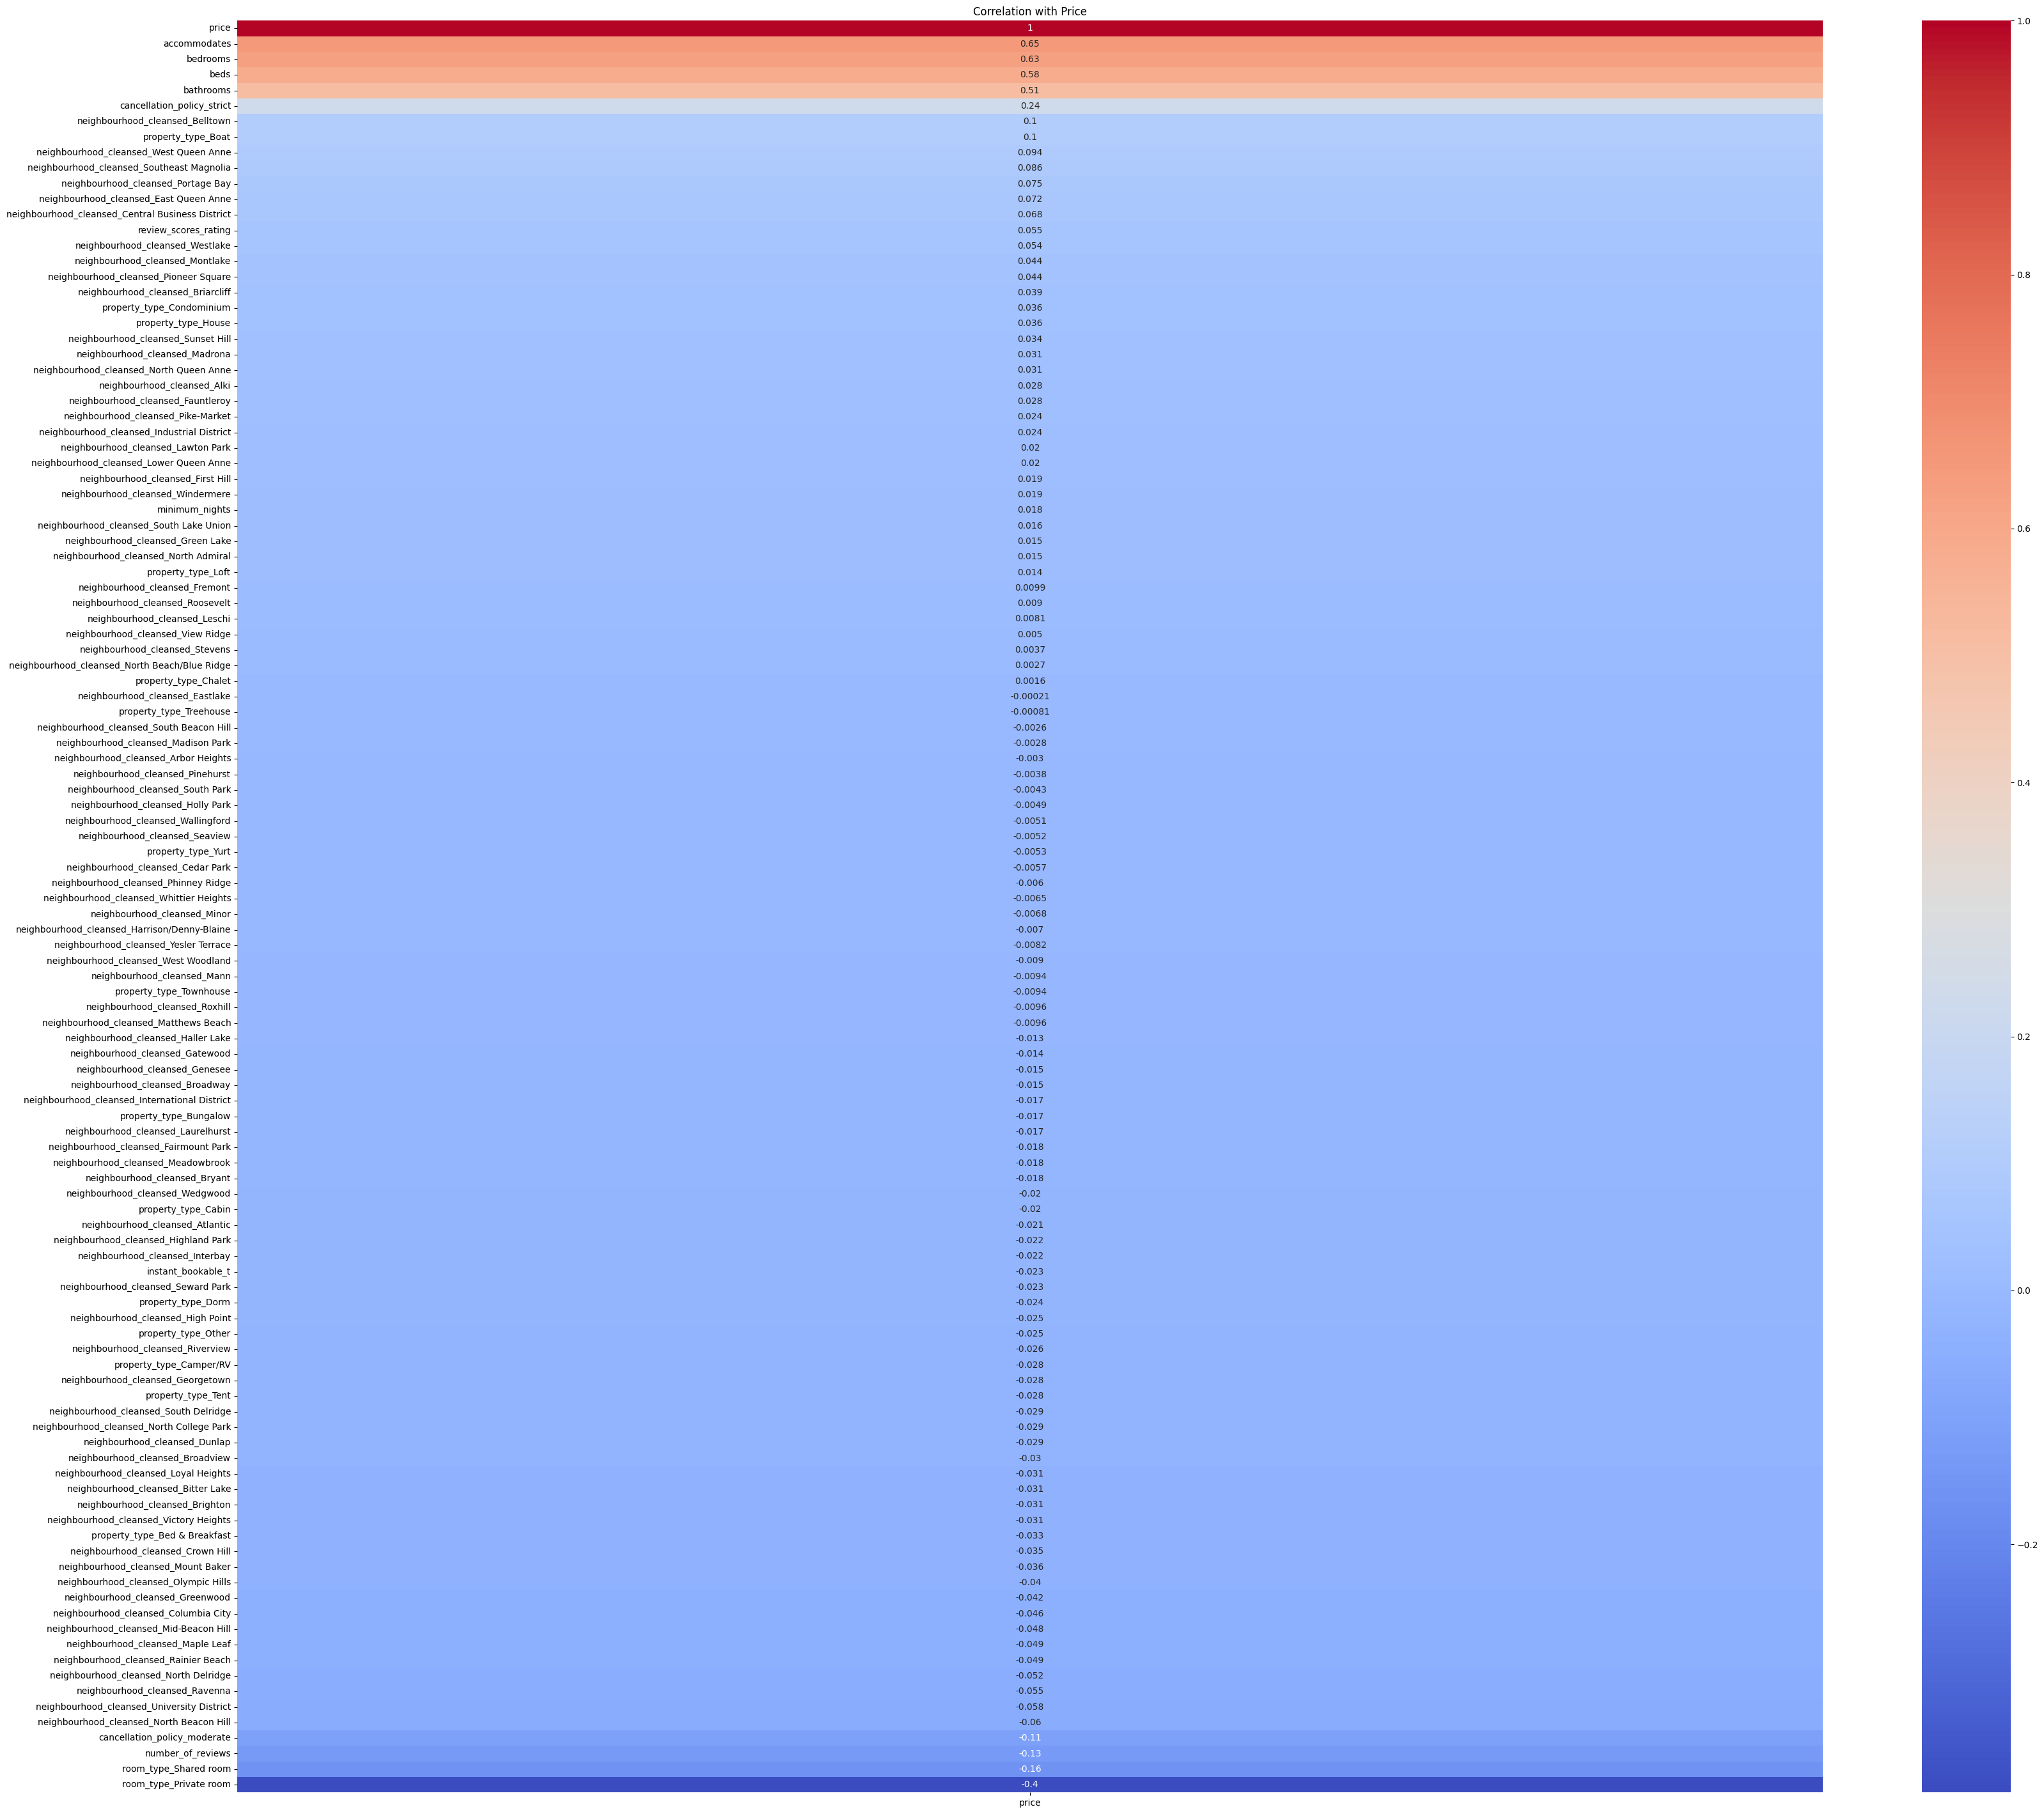

In [74]:
#Charts 
plt.figure(figsize=(40,36))
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()


In [76]:
#Export clean & encoded data to project output folder as csv 
data_encoded.to_csv('../outputs/airbnb_cleaned_encoded.csv', index=False)
